# This is a heart disease prediction project 

* 1- Problem identification.
* 2- Data 
* 3- Evaluate
* 4- Feature
* 5- Modelling
* 6 Experimentations

In [4]:
#importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing models of sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Import evaluation libraries

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [6]:
df = pd.read_csv('Heart_Disease_Prediction new.csv')

In [8]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [10]:
df.shape

(270, 14)

In [12]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [14]:
df['Heart Disease'].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

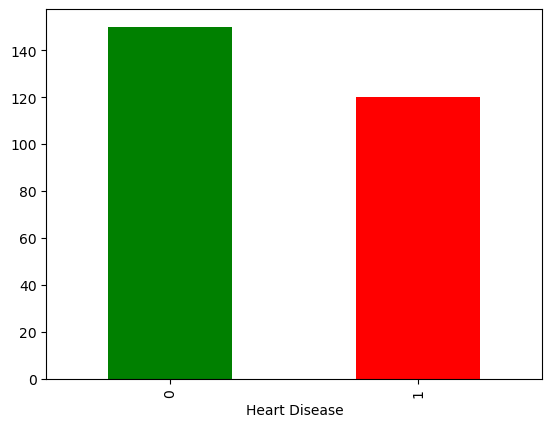

In [16]:
df['Heart Disease'].value_counts().plot(kind = 'bar', color = ['green', 'red']);

In [18]:
df.isna().sum() # checking Are there any missing values

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [20]:
df.describe() #To view the mean, min max etc

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


# how to see in terms of gender what is the ratio of heart disease 

In [25]:
df.Sex.count()

270

In [27]:
df.Sex.value_counts()  # 1 is male, 0 is female 

Sex
1    183
0     87
Name: count, dtype: int64

In [29]:
crosstab_results = pd.crosstab(df['Heart Disease'] ,df['Sex'])

crosstab_results

Sex,0,1
Heart Disease,,
0,67,83
1,20,100


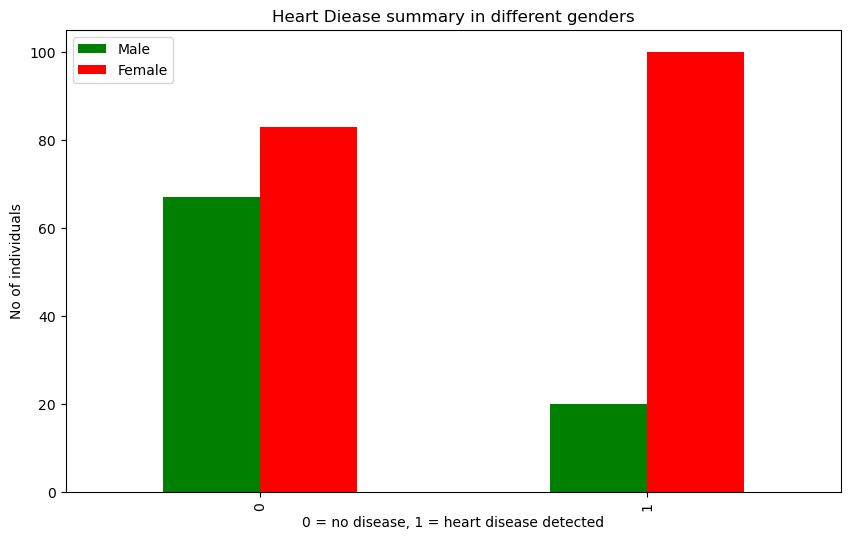

In [31]:
crosstab_results = pd.crosstab(df['Heart Disease'] ,df['Sex']).plot(kind = 'bar',
                                                                   figsize = (10,6),
                                                                   color = ['green', 'red'])
plt.title('Heart Diease summary in different genders')
plt.xlabel ('0 = no disease, 1 = heart disease detected')
plt.ylabel ('No of individuals')
plt.legend (['Male', 'Female'])

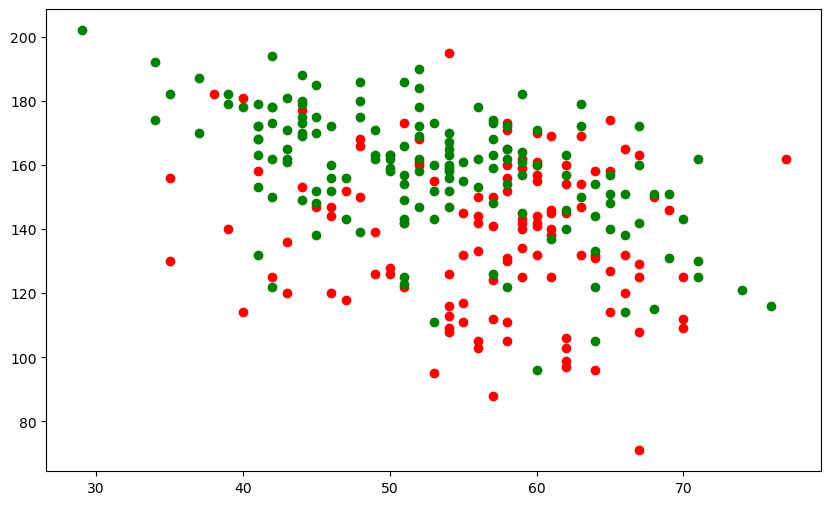

In [33]:
#Finding pattern using scatter plot

plt.figure(figsize = (10,6))

scatter_plot = plt.scatter(df['Age'][df['Heart Disease']==1], df['Max HR'][df['Heart Disease']==1], c = 'red')
scatter_plot = plt.scatter(df['Age'][df['Heart Disease']==0], df['Max HR'][df['Heart Disease']==0], c = 'green')

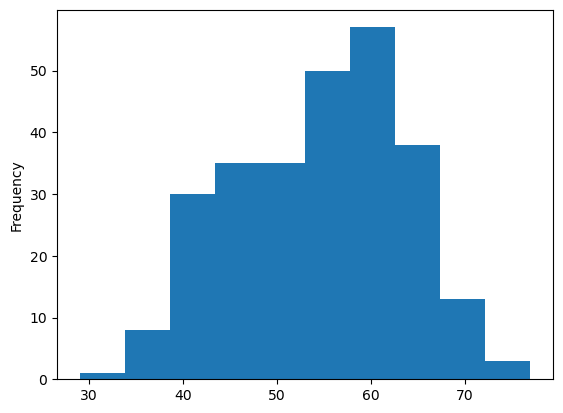

In [35]:
# Creating histogrm to view age distribution

df.Age.plot.hist();

In [37]:
df['Chest pain type'].value_counts()

Chest pain type
4    129
3     79
2     42
1     20
Name: count, dtype: int64

In [39]:
pd.crosstab(df['Chest pain type'], df['Heart Disease'])

Heart Disease,0,1
Chest pain type,,
1,15,5
2,35,7
3,62,17
4,38,91


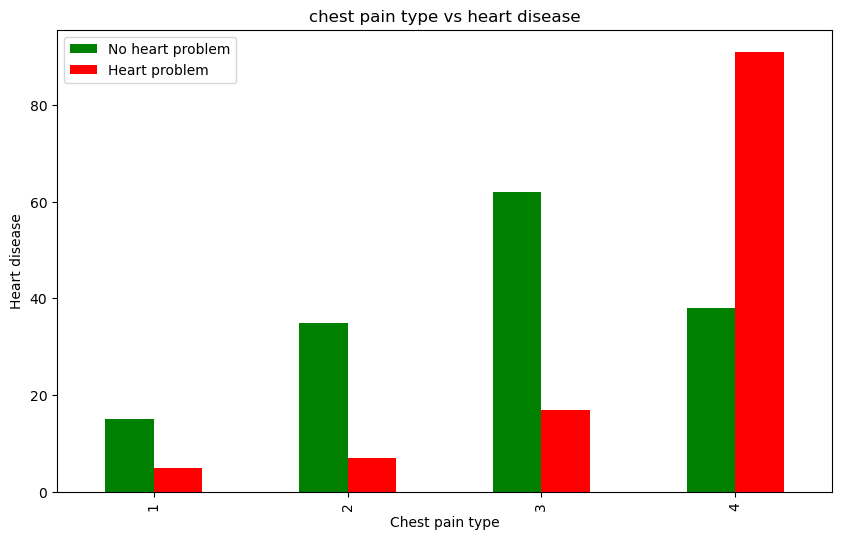

In [41]:
pd.crosstab(df['Chest pain type'], df['Heart Disease']).plot(kind = 'bar',
                                                            figsize = (10,6),
                                                            color = ['green', 'red'])
# Giving description to the chart

plt.title('chest pain type vs heart disease')
plt.xlabel ('Chest pain type')
plt.ylabel ('Heart disease')
plt.legend (['No heart problem', 'Heart problem']);

In [43]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [45]:
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


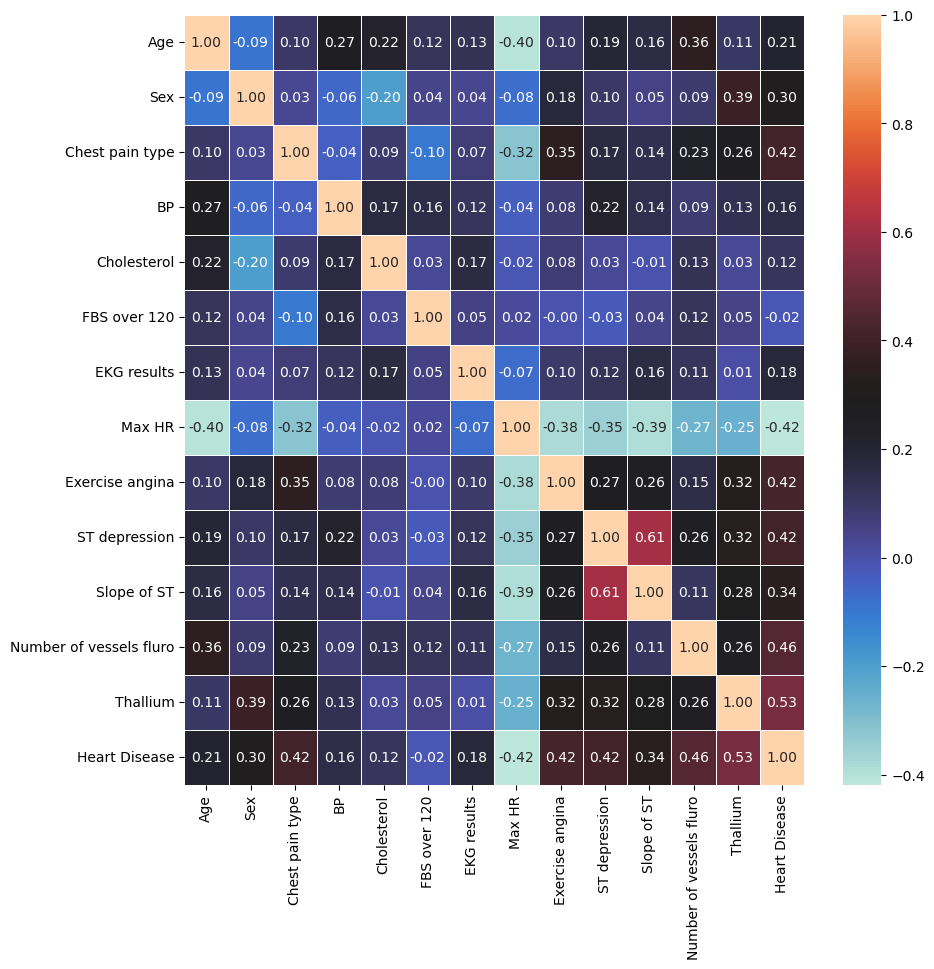

In [47]:
# Lets draw correlation map

corr_map = df.corr()

home, room = plt.subplots( figsize = (10,10),)

room = sns.heatmap (corr_map, 
                   annot = True,
                   linewidths = 0.5,
                   fmt = '0.2f',
                   cmap = 'icefire')

In [49]:
# Break the data into train and test

In [51]:
x = df.drop('Heart Disease', axis = 1)
y = df['Heart Disease']

In [53]:
np.random.seed(7)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# Now lets choose three best model for our dataset
* 1- K Nearest Neighbours Classifier.
* 2- Random Forest Classifier.
* 3- Logistic Regression.

In [56]:
# Create a dictionary for the models

models = {'KNN':KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Logistic Regression': LogisticRegression()}


# Now create a function to evaluate these three models 

def fit_and_score (models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    #make a dictionary to score the model
    model_score = {}
    #Looping thorugh
    for name,model in models.items():
        model.fit(x_train,y_train)
        # Evaluate the model and append the score
        model_score[name] = model.score(x_test,y_test)
    return model_score



In [58]:
model_score = fit_and_score(models = models,
                           x_train = x_train,
                           x_test = x_test,
                           y_train = y_train,
                           y_test = y_test)
model_score

C:\Users\MyPC\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7037037037037037,
 'Random Forest': 0.7962962962962963,
 'Logistic Regression': 0.7962962962962963}

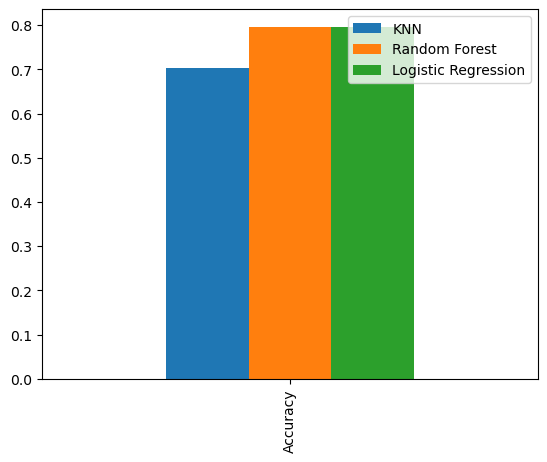

In [60]:
model_compare = pd.DataFrame(model_score, index = ['Accuracy'])

model_compare.plot.bar();

In [62]:
# improving and tuning the model

Universal method for all classifications problem

* Hyperparameter Tuning.
* Features improving.

Advanced level:

* Confusion Matrix
* Cross_validation.
*Precision.
*Recall.
*F1
* Classification report.
* ROC curve.

In [67]:
KNN = KNeighborsClassifier()

KNN.set_params()

KNeighborsClassifier()

In [69]:
# Doing it for KNN feature hypertuning

train_score = []
test_score = [] #yh empty list h

nneighbors = range (1,30)

#KNN instance 

KNN = KNeighborsClassifier()

for i in nneighbors:
    KNN.set_params(n_neighbors = i)
    #Run the fit for ith value
    KNN.fit(x_train,y_train)
    #Update the training score
    train_score.append(KNN.score(x_train,y_train))
    #Update the test score list
    test_score.append(KNN.score(x_test,y_test))



In [71]:
train_score

[1.0,
 0.7685185185185185,
 0.8055555555555556,
 0.7962962962962963,
 0.7870370370370371,
 0.7731481481481481,
 0.7453703703703703,
 0.7453703703703703,
 0.7361111111111112,
 0.75,
 0.7361111111111112,
 0.7222222222222222,
 0.7314814814814815,
 0.6944444444444444,
 0.6990740740740741,
 0.7129629629629629,
 0.7175925925925926,
 0.7222222222222222,
 0.6990740740740741,
 0.6898148148148148,
 0.6990740740740741,
 0.7129629629629629,
 0.7037037037037037,
 0.7175925925925926,
 0.7222222222222222,
 0.6898148148148148,
 0.6851851851851852,
 0.6851851851851852,
 0.6944444444444444]

In [73]:
test_score

[0.5925925925925926,
 0.6481481481481481,
 0.6851851851851852,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.6481481481481481,
 0.6296296296296297,
 0.6296296296296297,
 0.6481481481481481,
 0.6296296296296297,
 0.6851851851851852,
 0.6851851851851852,
 0.7037037037037037,
 0.7037037037037037,
 0.7407407407407407,
 0.7407407407407407,
 0.7222222222222222,
 0.7222222222222222,
 0.7407407407407407,
 0.7222222222222222,
 0.7037037037037037,
 0.7037037037037037,
 0.7222222222222222,
 0.7222222222222222,
 0.7037037037037037,
 0.7222222222222222,
 0.7037037037037037,
 0.6666666666666666]

Max accuracy of KNN:74.07%


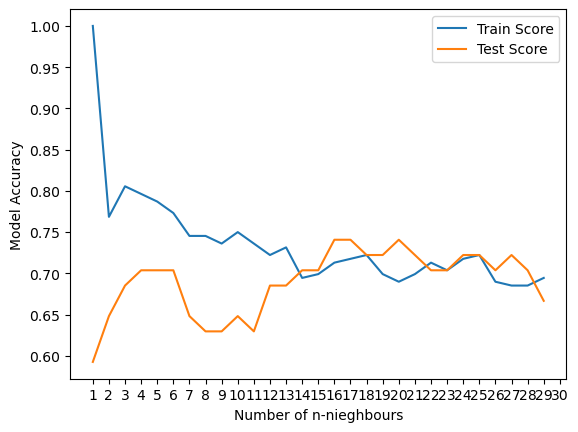

In [75]:
plt.plot(nneighbors, train_score, label = "Train Score")
plt.plot(nneighbors, test_score, label = "Test Score")

plt.xticks(np.arange(1,31,1))
plt.xlabel("Number of n-nieghbours")
plt.ylabel("Model Accuracy")
plt.legend()

print(f"Max accuracy of KNN:{max(test_score)*100:0.2f}%")

# Hyperparameter tunning using Randomized Search CV

In [78]:
#Parameters selected
# 1- C
# 2- Solver


LR_HP = {'C' : np.logspace(-4,4,20),
        'solver' : ['liblinear']
        }


In [82]:
# for RandomForestClassifier

RFC_HP = {'n_estimators': np.arange(10,1600,100),
          'max_depth': [None,3,5,7,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

In [84]:
#Tuning LogisticRegression model

np.random.seed(7)

lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions = LR_HP,
                       cv = 5,
                       n_iter = 20,
                       verbose = True)

# fit the model

lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [86]:
lr.score(x_test,y_test)

0.7962962962962963

In [88]:
lr.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [90]:
#Tuning RandomForestClassifier model

np.random.seed(7)

rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions = RFC_HP,
                       cv = 5,
                       n_iter = 20,
                       verbose = True)

# fit the model

rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [91]:
rfc.score(x_test,y_test)

0.7962962962962963

In [ ]:
rfc.best_params_

# Grid Search CV

In [ ]:
#Tuning LogisticRegression model

np.random.seed(7)

lr_grid = GridSearchCV(LogisticRegression(),
                       param_grid = LR_HP,
                       cv = 5,
                       verbose = True)

# fit the model

lr_grid.fit(x_train,y_train)

In [ ]:
lr_grid.score(x_test,y_test)

In [ ]:
lr_grid.best_params_

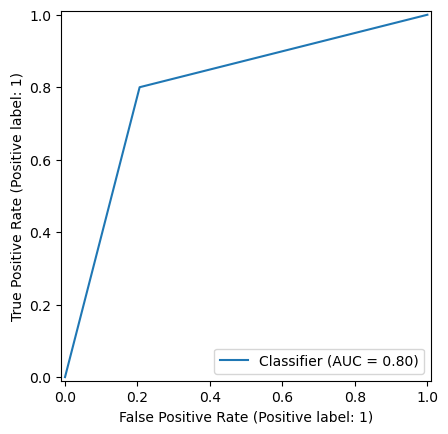

In [94]:
# Plotting area under the curve

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

y_predicted = lr.predict(x_test)
disp = RocCurveDisplay.from_predictions(y_test, y_predicted)
plt.show()

In [96]:
# Confusion Matrix

print(confusion_matrix(y_test, y_predicted))

[[27  7]
 [ 4 16]]


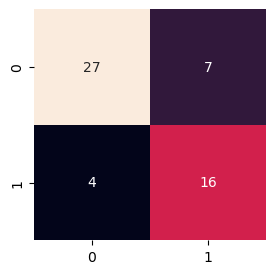

In [98]:
# Plotting this matrix

#Creating a function

def plot_confusion(y_test, y_predicted):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_predicted),
                    annot=True,
                    cbar=False)

plot_confusion(y_test, y_predicted)

# Classification report

In [105]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        34
           1       0.70      0.80      0.74        20

    accuracy                           0.80        54
   macro avg       0.78      0.80      0.79        54
weighted avg       0.81      0.80      0.80        54



In [107]:
lr.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [109]:
# new instance

lr_new = LogisticRegression(solver = 'liblinear', C = 1.623776739188721)

In [111]:
cv_accuracy = cross_val_score(lr_new,
                             x,
                             y,
                             cv = 7,
                             scoring = 'accuracy')

#Lets take the mean of all these 7 layers

cv_accuracy = np.mean(cv_accuracy)

cv_accuracy

0.8444187391555812

In [113]:
# Lets find cross validation precision

cv_precision = cross_val_score(lr_new,
                             x,
                             y,
                             cv = 7,
                             scoring = 'precision')

#Lets take the mean of all these 7 layers

cv_precision = np.mean(cv_precision)

cv_precision

0.8382936507936508

In [115]:
# Lets find cross validation recall

cv_recall = cross_val_score(lr_new,
                             x,
                             y,
                             cv = 7,
                             scoring = 'recall')

#Lets take the mean of all these 7 layers

cv_recall = np.mean(cv_recall)

cv_recall

0.8169934640522876

In [117]:
#We will find the cross validation f1 score
cv_f1 = cross_val_score(lr_new,
                             x,
                             y,
                             cv = 7,
                             scoring = 'f1')

#Lets take the mean of all these 7 layers
cv_f1 = np.mean(cv_f1)

cv_f1

0.8238329934758506

# Visualization of the tuned matrices

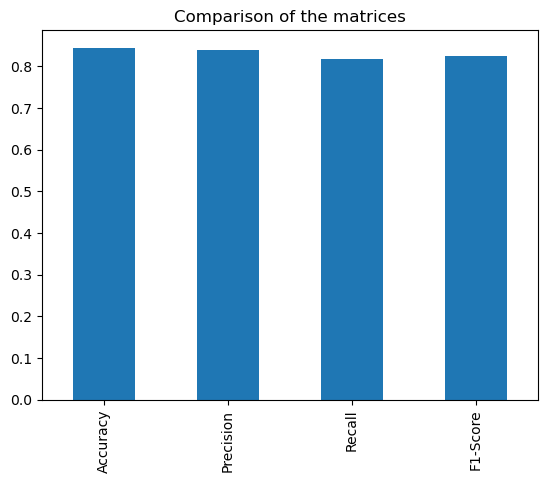

In [120]:
cv_plot = pd.DataFrame({
    'Accuracy':cv_accuracy,
    'Precision' :cv_precision,
    'Recall':cv_recall,
    'F1-Score':cv_f1
},index = [0])

cv_plot.T.plot.bar(title ='Comparison of the matrices' ,legend = False);


# Coefficent matrix

In [123]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [125]:
# checking coefficent

lr_new.fit(x_train, y_train)
lr_new.coef_

array([[-0.04142542,  0.88536006,  0.75769039,  0.006907  ,  0.00430555,
        -0.36826827,  0.13608641, -0.03590218,  1.14338761,  0.28028304,
         0.16150442,  1.15232211,  0.40048805]])

In [127]:
#We will see that these coefficent belongs to which feaures

final_coef = dict(zip (df.columns, list(lr_new.coef_[0])))

final_coef

{'Age': -0.041425419674836095,
 'Sex': 0.88536006236173,
 'Chest pain type': 0.7576903898534391,
 'BP': 0.006906999194583389,
 'Cholesterol': 0.004305552984174891,
 'FBS over 120': -0.3682682709002591,
 'EKG results': 0.13608640914229908,
 'Max HR': -0.03590217956970169,
 'Exercise angina': 1.1433876138359798,
 'ST depression': 0.2802830363461393,
 'Slope of ST': 0.16150442228438913,
 'Number of vessels fluro': 1.1523221120337823,
 'Thallium': 0.40048805372081947}

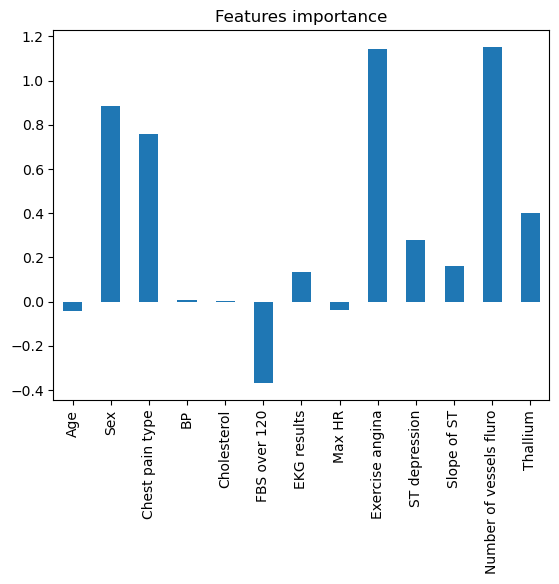

In [129]:
# We will plot this

feature = pd.DataFrame(final_coef,index=[0])

feature.T.plot.bar(title = 'Features importance', legend = False);